In [208]:
import matplotlib.pyplot as plt  # импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns

In [209]:
df = pd.read_csv('avocado.csv')  # открываем датасет

In [210]:
df.head() # изучаем датасет

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [211]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [212]:
# Date - дата наблюдения
# AveragePrice - средняя цена одного авокадо
# type - обыкновенное или органическое
# year - год урожая
# Region - регион реализации
# Total Volume - общее количество проданных авокадо
# 4046 - общее количество проданных авокадо (little hass)
# 4225 - общее количество проданных авокадо (large hass)
# 4770 - общее количество проданных авокадо (extra large hass)

In [213]:
# Параметры bags в разрезе авокадо никак не помогут, уберем их

df.drop(columns=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico


In [214]:
# Проверим пустые значения
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [215]:
# Удалим такие строки как TotalUS и прочие суммарные продажи, включающие в себя несколько штатов сразу

not_states = ['TotalUS', 'SouthCentral', 'Southeast', 'West', 'Midsouth', 'Northeast', 'Plains', 'GreatLakes']

i = df[df.region.isin(not_states)].index
df = df.drop(i)

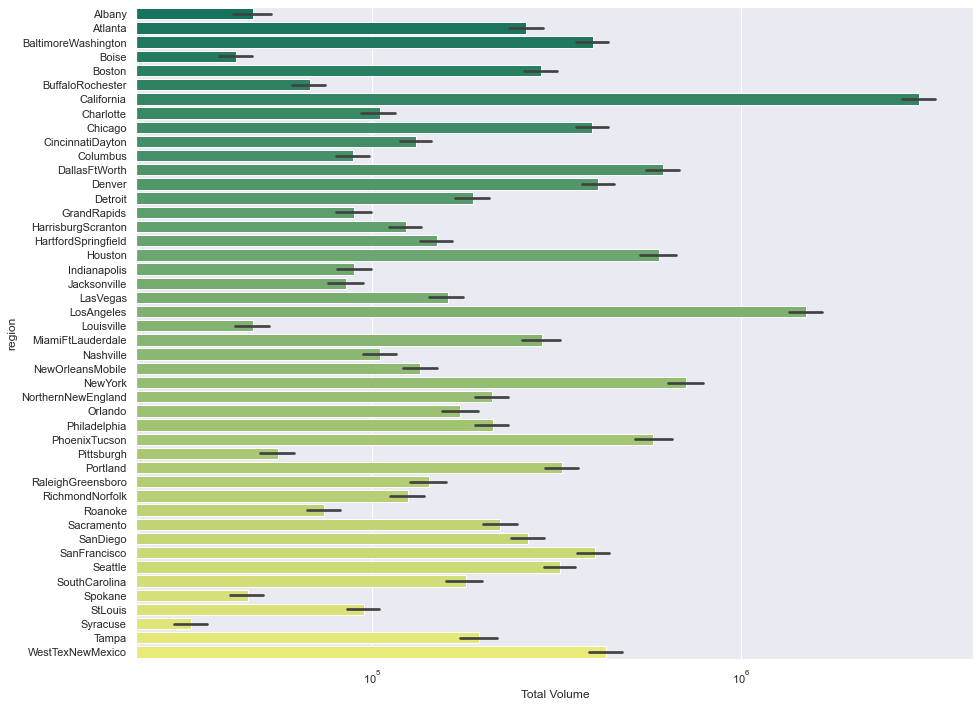

In [216]:
# Для начала взглянем, в каких штатах зеленый фрукт пользуется наибольшим спросом

x = df.region
y = df['Total Volume']

fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(y, x, orient="h", ax=ax, log=True, palette='summer')

In [217]:
# Очевидно, что силиконовая долина задает тренд не только в it-отрасли. Южные регионы, в принципе, более благосклонны к авокадо.
# Однако и восточное побережье во главе с НЙ не отстает.

In [218]:
# Узнаем, за какой период представлены наблюдения

df.Date = pd.to_datetime(df.Date)  # приведем колонку Дата к соответствующему формату
print(f'Данные представлены за период с {df.Date.min()} по {df.Date.max()}')

Данные представлены за период с 2015-01-04 00:00:00 по 2018-03-25 00:00:00


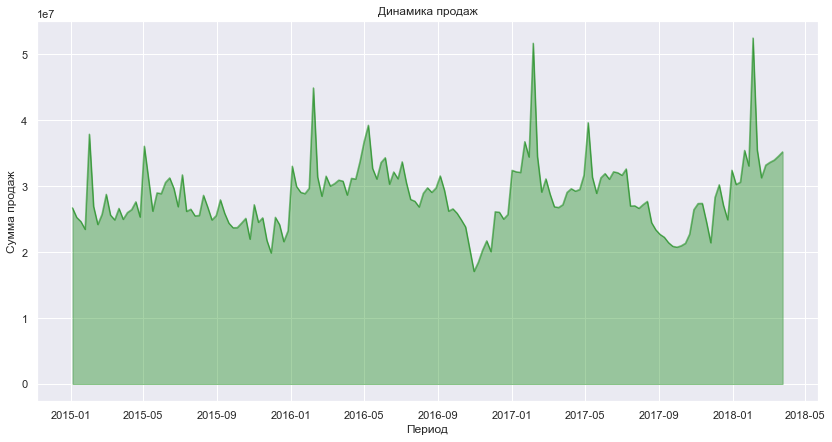

In [219]:
# И оценим динамику продаж

x = sorted(df.Date.unique())
y = df.groupby("Date")["Total Volume"].sum()

plt.figure(figsize=(14,7))
plt.plot(x, y, color='green', alpha=.5)
plt.fill_between(x, 0, y, color='green', alpha=.35)
plt.xlabel("Период")
plt.ylabel("Сумма продаж")
plt.title("Динамика продаж")
plt.show()

In [220]:
df.groupby(['Date'])['Total Volume'].sum().nlargest(5).to_frame()

,Total Volume
Date,
2018-02-04,52480062.69
2017-02-05,51688192.32
2016-02-07,44913501.87
2017-05-07,39631884.53
2016-05-08,39245267.42


In [221]:
# Пиковые продажи ежегодно приходятся на первую неделю февраля.
# И в то же время нельзя не отметить растущий спрос из года в год.
# Проверим, не является ли данный период самым низким с точки зрения цены на фрукт.

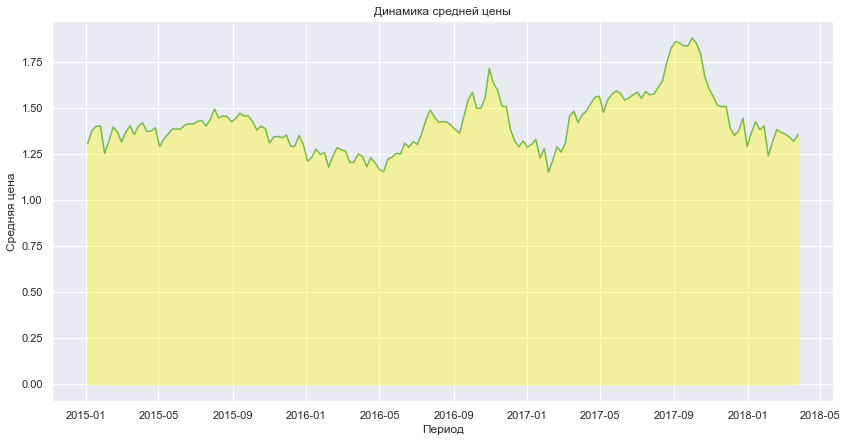

In [222]:
y2 = df.groupby("Date")["AveragePrice"].mean()
plt.figure(figsize=(14,7))
plt.plot(x, y2, color='green', alpha=.5)
plt.fill_between(x, 0, y2, color='yellow', alpha=.35)
plt.xlabel("Период")
plt.ylabel("Средняя цена")
plt.title("Динамика средней цены")
plt.show()

In [223]:
# Однозначно да. Рынок авокадо пресыщается предложением к февралю - началу сезона. 
# Это также подтверждается ростом цены и снижением спроса к октябрю,
# когда последний урожай заканчивается и начинается новый сезон созревания.

Text(0, 0.5, '')

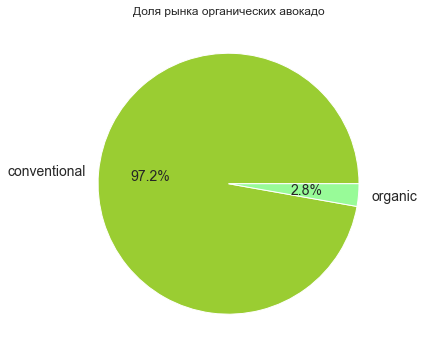

In [224]:
# Раз уж речь зашла о трендах Калифорнии, проверим, правда ли органические авокадо пользуются большим спросом в США

d = df.groupby(['type'])['Total Volume'].sum()
d.plot.pie(figsize=(12, 6), autopct='%1.1f%%',
           colors = ['yellowgreen', 'palegreen'],
           fontsize=14,
           title='Доля рынка органических авокадо')
plt.ylabel('')

In [225]:
# Вероятно, любители авокадо прекрасно понимают, что данный фрукт не подвержен влиянию пестицидов, 
# а потому доминирующая доля рынка приходится на conventional тип.
# Или же дело исключительно в высокой цене органических фруктов?

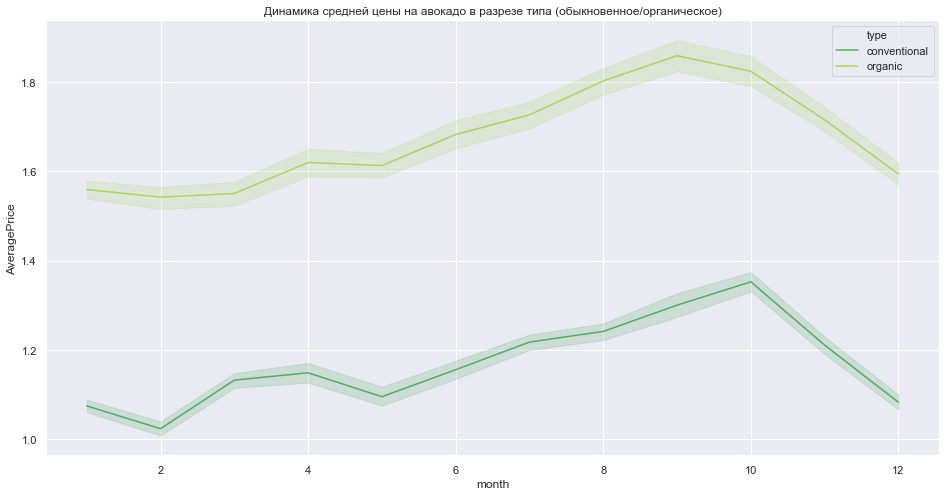

In [226]:
# Оценим среднюю цену на разные типы авокадо в разрезе отдельного месяца
df['month'] = pd.DatetimeIndex(df['Date']).month

plt.figure(figsize=(16,8))
plt.title('Динамика средней цены на авокадо в разрезе типа (обыкновенное/органическое)')
sns.lineplot(x="month", y="AveragePrice", hue='type', data=df, palette='summer')
plt.show()

In [227]:
# Органические авокадо - это дорого.
# Органические авокадо - это бессмысленно.

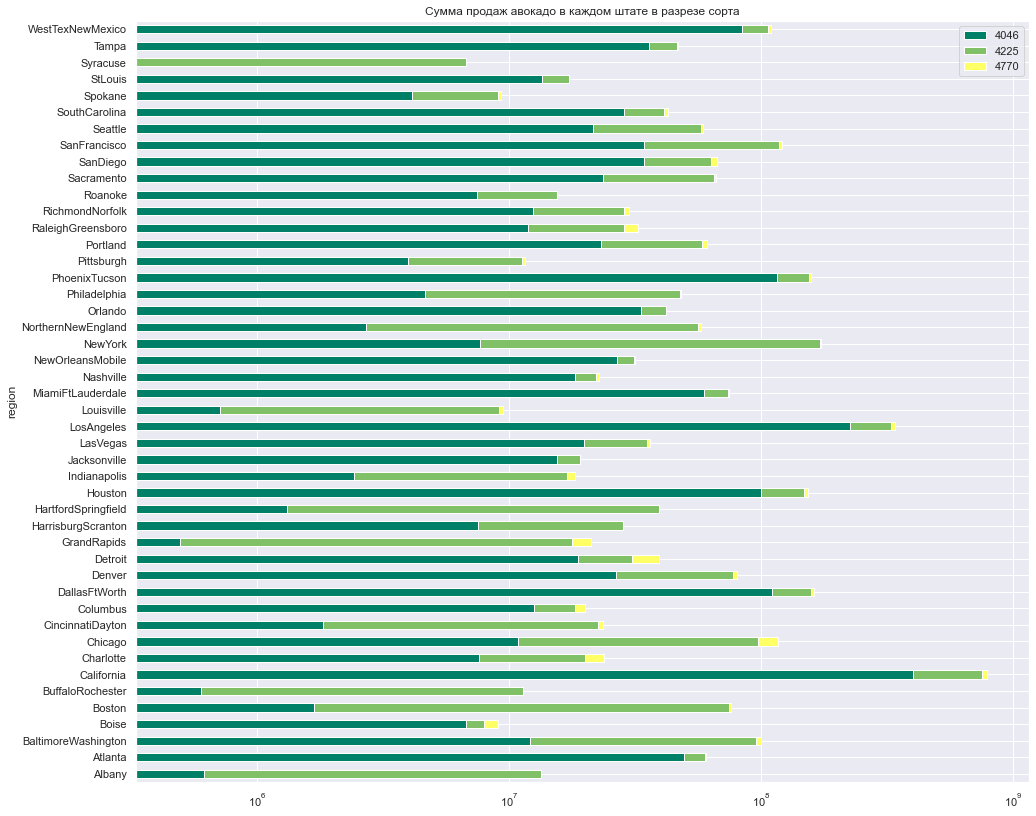

In [228]:
# И, напоследок, рассмотрим, влияет ли размер авокадо на его популярность в штатах

sizes = df[['4046', '4225', '4770']].groupby(df.region).sum()
sizes.plot(kind='barh', stacked=True, figsize=(16,14),
           title='Сумма продаж авокадо в каждом штате в разрезе сорта',
           colormap='summer',
           logx=True)
plt.show()

In [229]:
# Первое, что бросается в глаза - низкая популярность extra large авокадо.
# Основная доля по стране приходится на small (4046) авокадо, однако в определенных штатах
# их потеснили братья постарше - large (4225).
# Особенно интересно географическое доминирование данного сорта на северо-востоке страны.